In [1]:
import os
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, LassoLars, LassoLarsCV, ElasticNet, ElasticNetCV, BayesianRidge, ARDRegression
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_validate, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, RobustScaler, MinMaxScaler, MaxAbsScaler, Normalizer, StandardScaler, PowerTransformer
from sklearn.svm import SVR, LinearSVR, NuSVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

%matplotlib inline
sns.set()
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 300)

# -----------------------------------------------------------------------------------------------------

# Importation dataset

# -----------------------------------------------------------------------------------------------------

In [2]:
base_path = os.path.join('../input/train.csv')
base_path

'../input/train.csv'

In [3]:
df = pd.read_csv(base_path)

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

# -----------------------------------------------------------------------------------------------------

# Feature Understanding – What's in the Dataset?

# -----------------------------------------------------------------------------------------------------

In [7]:
df['MSSubClass'] = df['MSSubClass'].astype('str')

In [8]:
df['MoSold'] = df['MoSold'].astype('str')

In [9]:
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

In [10]:
df['TotalPorch'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']

In [11]:
df.set_index('Id', drop=True, inplace=True)

# -----------------------------------------------------------------------------------------------------

# Feature Improvement - Cleaning Datasets

# -----------------------------------------------------------------------------------------------------

# Check NaN:

In [12]:
for col in df.columns:
    diff = df[col].isnull().sum()
    if diff != 0:
        print('missing values for {}: {}'.format(col, diff))

missing values for LotFrontage: 259
missing values for Alley: 1369
missing values for MasVnrType: 8
missing values for MasVnrArea: 8
missing values for BsmtQual: 37
missing values for BsmtCond: 37
missing values for BsmtExposure: 38
missing values for BsmtFinType1: 37
missing values for BsmtFinType2: 38
missing values for Electrical: 1
missing values for FireplaceQu: 690
missing values for GarageType: 81
missing values for GarageYrBlt: 81
missing values for GarageFinish: 81
missing values for GarageQual: 81
missing values for GarageCond: 81
missing values for PoolQC: 1453
missing values for Fence: 1179
missing values for MiscFeature: 1406


# Fill Missing Values:

In [13]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())

In [14]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

In [15]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [16]:
df['MasVnrType'] = df['MasVnrType'].fillna('None')

In [17]:
fill_with_NA = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu',
               'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

for col in fill_with_NA:
    df[col] = df[col].fillna('NA')

In [18]:
df.isnull().sum().all()

False

# -----------------------------------------------------------------------------------------------------

# Remove outliers

# -----------------------------------------------------------------------------------------------------

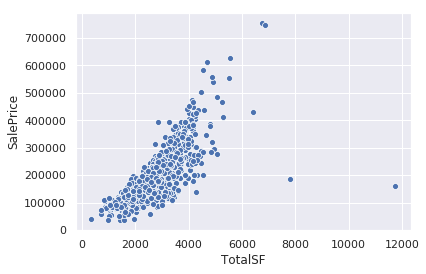

In [19]:
sns.scatterplot(x=df['TotalSF'], y=df['SalePrice']);

In [20]:
df['TotalSF'].loc[df['TotalSF'] > 6000].loc[df['SalePrice'] < 300000]

Id
524      7814
1299    11752
Name: TotalSF, dtype: int64

In [21]:
Id_to_drop = [524, 1299]

In [22]:
df.drop(Id_to_drop, inplace=True)

In [23]:
df.reset_index(drop=True, inplace=True)

In [24]:
df.shape

(1458, 82)

# EDA

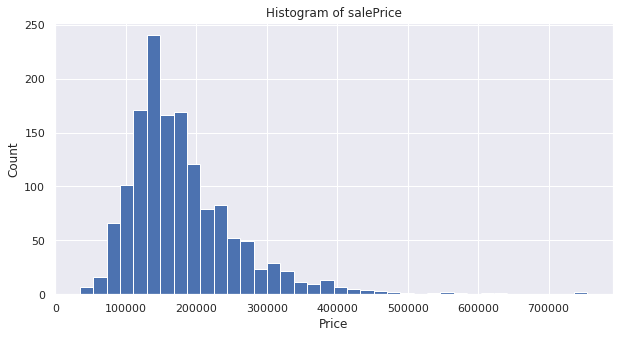

In [25]:
bins = int(np.sqrt(len(df)))

plt.figure(figsize=(10, 5))
plt.title('Histogram of salePrice')
plt.xlabel('Price')
plt.ylabel('Count')
plt.hist(df['SalePrice'], bins=bins);

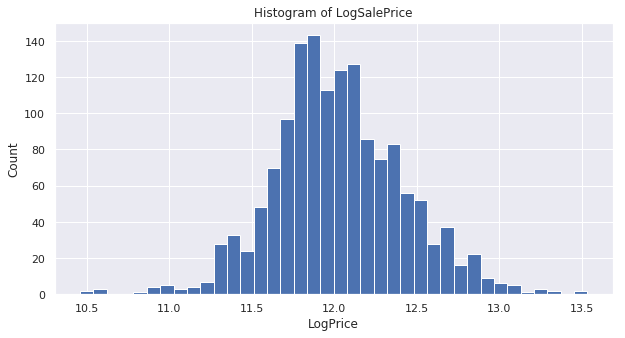

In [26]:
plt.figure(figsize=(10, 5))
plt.title('Histogram of LogSalePrice')
plt.xlabel('LogPrice')
plt.ylabel('Count')
plt.hist(np.log1p(df['SalePrice']), bins=bins);

In [27]:
df['SalePrice_log_transform'] = np.log(df['SalePrice'])

In [28]:
df.drop(labels='SalePrice', axis=1, inplace=True)

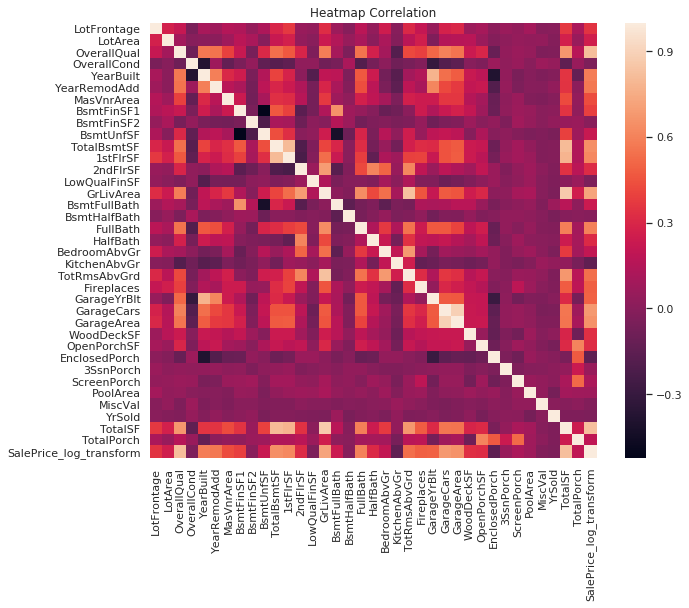

In [29]:
plt.figure(figsize=(10, 8))
plt.title('Heatmap Correlation')
sns.heatmap(df.corr());

In [30]:
df.corr()['SalePrice_log_transform']

LotFrontage                0.351551
LotArea                    0.260544
OverallQual                0.821404
OverallCond               -0.036821
YearBuilt                  0.587043
YearRemodAdd               0.565992
MasVnrArea                 0.430569
BsmtFinSF1                 0.392283
BsmtFinSF2                 0.004863
BsmtUnfSF                  0.221892
TotalBsmtSF                0.647563
1stFlrSF                   0.620500
2ndFlrSF                   0.319953
LowQualFinSF              -0.037951
GrLivArea                  0.725211
BsmtFullBath               0.237099
BsmtHalfBath              -0.005124
FullBath                   0.595899
HalfBath                   0.314186
BedroomAbvGr               0.209036
KitchenAbvGr              -0.147534
TotRmsAbvGrd               0.537702
Fireplaces                 0.491998
GarageYrBlt                0.496179
GarageCars                 0.681033
GarageArea                 0.656128
WoodDeckSF                 0.334250
OpenPorchSF                0

# -----------------------------------------------------------------------------------------------------

# Standardization and normalization

# -----------------------------------------------------------------------------------------------------

In [31]:
object_cols = df.select_dtypes(include='object')

df_scaler = df.drop(labels=object_cols, axis=1)

In [32]:
ridge_params = {'model__alpha': [0.05, 0.5, 1, 5, 10]}

In [33]:
ridge = Ridge(random_state=42)

In [34]:
X_scaler = df_scaler.drop('SalePrice_log_transform', axis=1)
y_scaler = df_scaler['SalePrice_log_transform']

### No Scaler

In [35]:
df_NoScaler = Pipeline([('model', ridge)])

In [36]:
grid = GridSearchCV(df_NoScaler, ridge_params, scoring='neg_mean_squared_log_error')
grid.fit(X_scaler, y_scaler)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('model', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=42, solver='auto', tol=0.001))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'model__alpha': [0.05, 0.5, 1, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_log_error', verbose=0)

In [37]:
print(-grid.best_score_, grid.best_params_)

0.00010314795944783258 {'model__alpha': 5}


### List of scalers

In [38]:
scaler_lst = [MaxAbsScaler(), MinMaxScaler(), Normalizer(), RobustScaler(), PowerTransformer(), StandardScaler()]

In [39]:
for scaler in scaler_lst:
    df_scaler = Pipeline([('scaler', scaler), ('model', ridge)])
    grid = GridSearchCV(df_scaler, ridge_params, scoring='neg_mean_squared_log_error')
    grid.fit(X_scaler, y_scaler)
    print(scaler, -grid.best_score_, grid.best_params_)

MaxAbsScaler(copy=True) 0.00010538041872590627 {'model__alpha': 0.05}
MinMaxScaler(copy=True, feature_range=(0, 1)) 0.00010197540760695121 {'model__alpha': 1}
Normalizer(copy=True, norm='l2') 0.00027339392499500223 {'model__alpha': 0.05}
RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True) 0.00010294697059551996 {'model__alpha': 10}
PowerTransformer(copy=True, method='yeo-johnson', standardize=True) 9.702234427441031e-05 {'model__alpha': 10}
StandardScaler(copy=True, with_mean=True, with_std=True) 0.0001029476572115449 {'model__alpha': 10}


# -----------------------------------------------------------------------------------------------------

# Feature Construction

# -----------------------------------------------------------------------------------------------------

### Dummies

In [40]:
dum_lst = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1',
           'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
           'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'GarageFinish',
           'PavedDrive', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition']

for dum in dum_lst:
    df = pd.concat([df, pd.get_dummies(df[dum], prefix=dum)], axis=1)

In [41]:
df.drop(labels=dum_lst, axis=1, inplace=True)

In [42]:
df.head()

,LotFrontage,LotArea,LotShape,LandContour,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,YrSold,TotalSF,TotalPorch,SalePrice_log_transform,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_NA,Alley_Pave,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_Fin,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,MiscFeature_Gar2,MiscFeature_NA,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_1,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,Reg,Lvl,Gtl,7,5,2003,2003,196.0,Gd,TA,Gd,TA,No,GLQ,706,Unf,0,150,

### Categories

In [43]:
def cat_col(col, order=None):
    df[col] = df[col].astype('category', ordered=True, categories=order).cat.codes

In [44]:
cat_col('LotShape', order=['Reg', 'IR1', 'IR2', 'IR3'])

cat_col('LandContour', order=['Lvl', 'Bnk', 'HLS', 'Low'])

cat_col('LandSlope', order=['Gtl', 'Mod', 'Sev'])

cat_lst = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual',
           'GarageCond', 'PoolQC']
ordered_lst = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
for col in cat_lst:
    cat_col(col, order=ordered_lst)
    
cat_col('BsmtExposure', order=['Gd', 'Av', 'Mn', 'No', 'NA'])

cat_lst_2 = ['BsmtFinType1', 'BsmtFinType2']
ordered_lst_2 = ['Unknown', 'NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
for col in cat_lst_2:
    cat_col(col, order=ordered_lst_2)

cat_col('Functional', order=['Typ', 'Min1', 'Min2', 'Mod', 'Maj1', 'Maj2', 'Sev', 'Sal'])

cat_col('Fence', order=['GdPrv', 'MnPrv', 'GdWo', 'MnWw', 'NA'])

In [45]:
df.head()

,LotFrontage,LotArea,LotShape,LandContour,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,YrSold,TotalSF,TotalPorch,SalePrice_log_transform,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_NA,Alley_Pave,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_Fin,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,MiscFeature_Gar2,MiscFeature_NA,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_1,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,0,0,0,7,5,2003,2003,196.0,4,3,4,3,3,7,706,2,0,150,856,5,856,854,0

In [46]:
df.describe()

,LotFrontage,LotArea,LotShape,LandContour,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,YrSold,TotalSF,TotalPorch,SalePrice_log_transform,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_NA,Alley_Pave,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_Fin,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,MiscFeature_Gar2,MiscFeature_NA,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_1,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000

In [47]:
X = df.drop('SalePrice_log_transform', axis=1)
y = df['SalePrice_log_transform']

In [48]:
pipe_params = {
    'model__alpha': [1, 5, 10, 20, 50],
    'scaler': [MaxAbsScaler(), MinMaxScaler(), Normalizer(), RobustScaler(), PowerTransformer(), StandardScaler()]
}

In [49]:
pipe = Pipeline([('scaler', scaler), ('model', ridge)])

In [50]:
grid = GridSearchCV(pipe, pipe_params, scoring='neg_mean_squared_log_error')
grid.fit(X_scaler, y_scaler)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=42, solver='auto', tol=0.001))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'model__alpha': [1, 5, 10, 20, 50], 'scaler': [MaxAbsScaler(copy=True), MinMaxScaler(copy=True, feature_range=(0, 1)), Normalizer(copy=True, norm='l2'), RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True), PowerTransformer(copy=True, method='yeo-johnson', standardize=True), StandardScaler(copy=True, with_mean=True, with_std=True)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_log_error', verbose=0)

In [51]:
print(-grid.best_score_, grid.best_params_)

9.682481119236729e-05 {'model__alpha': 50, 'scaler': PowerTransformer(copy=True, method='yeo-johnson', standardize=True)}


# With polyfeature, Mean Squared Logarithmic Error cannot be used when targets contain negative values.

# -----------------------------------------------------------------------------------------------------

# Features Selection

# -----------------------------------------------------------------------------------------------------

### Feature selection using Pearson correlation

In [52]:
df_corr = pd.DataFrame({
    'Pearson_corr': df.corr()['SalePrice_log_transform'].abs()}).sort_values('Pearson_corr', ascending=False)

df_corr.loc[df_corr['Pearson_corr'] > 0.2].head()

,Pearson_corr
SalePrice_log_transform,1.000000
TotalSF,0.825326
OverallQual,0.821404
GrLivArea,0.725211
ExterQual,0.682225


In [53]:
df_corr.shape

(255, 1)

### Feature selection using hypothesis testing

In [54]:
from sklearn.feature_selection import SelectKBest

In [55]:
from sklearn.feature_selection import f_regression

In [56]:
k_best = SelectKBest(f_regression, k=5)

In [57]:
k_best.fit_transform(X, y)

array([[7.000e+00, 4.000e+00, 1.710e+03, 2.000e+00, 2.566e+03],
       [6.000e+00, 3.000e+00, 1.262e+03, 2.000e+00, 2.524e+03],
       [7.000e+00, 4.000e+00, 1.786e+03, 2.000e+00, 2.706e+03],
       ...,
       [7.000e+00, 5.000e+00, 2.340e+03, 1.000e+00, 3.492e+03],
       [5.000e+00, 3.000e+00, 1.078e+03, 1.000e+00, 2.156e+03],
       [5.000e+00, 4.000e+00, 1.256e+03, 1.000e+00, 2.512e+03]])

In [58]:
k_best.pvalues_[:5]

array([1.15863500e-43, 4.72970429e-24, 2.75064085e-29, 2.73266743e-02,
       1.41195335e-01])

In [59]:
df_p_val = pd.DataFrame({
    'column': X.columns,
    'p_value': k_best.pvalues_,}, index=X.columns).sort_values('p_value')

df_p_val.drop(labels='column', axis=1, inplace=True)

In [60]:
df_p_val[df_p_val['p_value'] < .05].head(10)

,p_value
TotalSF,0.000000e+00
OverallQual,0.000000e+00
GrLivArea,2.966447e-238
ExterQual,2.968806e-200
GarageCars,2.713298e-199
KitchenQual,1.311479e-190
GarageArea,3.161269e-180
TotalBsmtSF,4.417067e-174
1stFlrSF,6.575407e-156
BsmtQual,1.270877e-153


In [61]:
df_p_val.shape

(254, 1)

### Comparison between Pearson corr & p_values

In [62]:
df_concat = pd.concat([df_corr, df_p_val], axis=1)
df_concat = df_concat.sort_values('Pearson_corr', ascending=False)
stats_sel = df_concat.loc[df_concat['Pearson_corr'] >= 0.2].loc[df_concat['p_value'] <= 0.05]
stats_sel.head(10)

,Pearson_corr,p_value
TotalSF,0.825326,0.000000e+00
OverallQual,0.821404,0.000000e+00
GrLivArea,0.725211,2.966447e-238
ExterQual,0.682225,2.968806e-200
GarageCars,0.681033,2.713298e-199
KitchenQual,0.669989,1.311479e-190
GarageArea,0.656128,3.161269e-180
TotalBsmtSF,0.647563,4.417067e-174
1stFlrSF,0.620500,6.575407e-156
BsmtQual,0.616897,1.270877e-153


### Using machine learning to select features

In [63]:
tree = RandomForestRegressor(random_state=42)

In [64]:
tree.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [65]:
df_imp = pd.DataFrame({
    'importance': tree.feature_importances_,
    'feature':X.columns}, index=X.columns).sort_values('importance', ascending=False)

In [66]:
df_imp.drop(labels='feature', axis=1, inplace=True)

In [67]:
df_imp.head(10)

,importance
OverallQual,0.422570
TotalSF,0.350738
CentralAir_Y,0.017439
GarageCars,0.016214
LotArea,0.011792
YearBuilt,0.010652
BsmtFinSF1,0.009799
YearRemodAdd,0.009254
GrLivArea,0.008763
OverallCond,0.008679


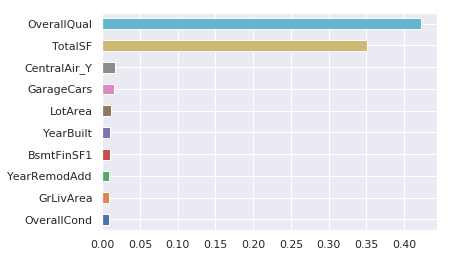

In [68]:
pd.Series(tree.feature_importances_, index=X.columns).nlargest(10).sort_values().plot(kind='barh');

In [92]:
pipe_params = {
    'model__max_depth': [None, 1, 3, 5, 7],
    'scaler': [MaxAbsScaler(), MinMaxScaler(), Normalizer(), RobustScaler(), PowerTransformer(), StandardScaler()]
}

In [93]:
pipe = Pipeline([('scaler', scaler), ('model', tree)])

In [94]:
grid = GridSearchCV(pipe, pipe_params, scoring='neg_mean_squared_log_error')
grid.fit(X, y)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('model', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'model__max_depth': [None, 1, 3, 5, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_log_error', verbose=0)

In [95]:
print(-grid.best_score_, grid.best_params_)

0.0001298215766223011 {'model__max_depth': None}


### Comparison between Pearson corr & p_values & tree

In [125]:
df_concat = pd.concat([stats_sel, df_imp], axis=1)
df_concat = df_concat.sort_values('Pearson_corr', ascending=False)
stats_tree_sel = df_concat.loc[df_concat['Pearson_corr'] >= 0.2].loc[df_concat['p_value'] <= 0.05].loc[df_concat['importance'] >= 0.01]
stats_tree_sel.head(20)

,Pearson_corr,p_value,importance
TotalSF,0.825326,0.000000e+00,0.350738
OverallQual,0.821404,0.000000e+00,0.422570
GarageCars,0.681033,2.713298e-199,0.016214
YearBuilt,0.587043,9.084861e-136,0.010652
CentralAir_Y,0.351598,1.126593e-43,0.017439
LotArea,0.260544,4.729704e-24,0.011792


# -----------------------------------------------------------------------------------------------------

# Feature Transformations

# -----------------------------------------------------------------------------------------------------

In [220]:
from sklearn.decomposition import PCA

In [276]:
scaler = MinMaxScaler()
X_rescaled = scaler.fit_transform(X)

In [277]:
pca = PCA().fit(X_rescaled)

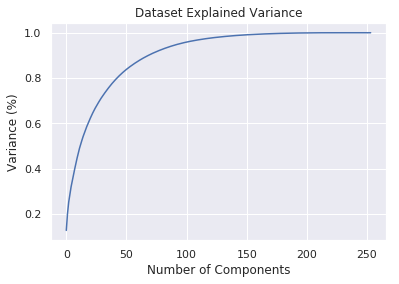

In [278]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Dataset Explained Variance');

### 150 components represent about 100% of the data

# -----------------------------------------------------------------------------------------------------

# Machine learning

# -----------------------------------------------------------------------------------------------------

# -----------------------------------------------------------------------------------------------------

In [40]:
df['MSSubClass_150'] = 0

In [41]:
df.head()

,Street,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,Electrical,KitchenQual,Functional,FireplaceQu,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MoSold,YrSold,SalePrice,TotalPorch,SalePrice_log_transform,GarageArea_poly1,GarageArea_poly2,TotalBsmtSF_poly1,TotalBsmtSF_poly2,MasVnrArea_poly1,MasVnrArea_poly2,OverallQual_poly1,OverallQual_poly2,TotalSF_poly1,TotalSF_poly2,1stFlrSF_poly1,1stFlrSF_poly2,LotFrontage_poly1,LotFrontage_poly2,LotArea_poly1,LotArea_poly2,OpenPorchSF_poly1,OpenPorchSF_poly2,GrLivArea_poly1,GrLivArea_poly2,BsmtUnfSF_poly1,BsmtUnfSF_poly2,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_Pave,Alley_Unknown,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Unknown,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_Unknown,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MasVnrArea_quartiles,BsmtFinSF1_quartiles,BsmtFinSF2_quartiles,2ndFlrSF_quartiles,LowQualFinSF_quartiles,WoodDeckSF_quartiles,OpenPorchSF_quartiles,EnclosedPorch_quartiles,3SsnPorch_quartiles,ScreenPorch_quartiles,MiscVal_quartiles,LotFrontage_quartiles,LotArea_quartiles,YearBuilt_quartiles,YearRemodAdd_quartiles,Bsm

In [42]:
object_cols = df.select_dtypes(include='object')

df.drop(labels=object_cols, axis=1, inplace=True)

In [43]:
df.drop(labels='SalePrice', axis=1, inplace=True)

In [44]:
df.head()

,OverallQual,OverallCond,YearBuilt,GarageYrBlt,MoSold,YrSold,TotalPorch,SalePrice_log_transform,GarageArea_poly1,GarageArea_poly2,TotalBsmtSF_poly1,TotalBsmtSF_poly2,MasVnrArea_poly1,MasVnrArea_poly2,OverallQual_poly1,OverallQual_poly2,TotalSF_poly1,TotalSF_poly2,1stFlrSF_poly1,1stFlrSF_poly2,LotFrontage_poly1,LotFrontage_poly2,LotArea_poly1,LotArea_poly2,OpenPorchSF_poly1,OpenPorchSF_poly2,GrLivArea_poly1,GrLivArea_poly2,BsmtUnfSF_poly1,BsmtUnfSF_poly2,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_Pave,Alley_Unknown,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Unknown,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_Unknown,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MasVnrArea_quartiles,BsmtFinSF1_quartiles,BsmtFinSF2_quartiles,2ndFlrSF_quartiles,LowQualFinSF_quartiles,WoodDeckSF_quartiles,OpenPorchSF_quartiles,EnclosedPorch_quartiles,3SsnPorch_quartiles,ScreenPorch_quartiles,MiscVal_quartiles,LotFrontage_quartiles,LotArea_quartiles,YearBuilt_quartiles,YearRemodAdd_quartiles,BsmtUnfSF_quartiles,TotalBsmtSF_quartiles,1stFlrSF_quartiles,GrLivArea_quartiles,TotRmsAbvGrd_quartiles,GarageYrBlt_quartiles,GarageArea_quartiles,MoSold_quartiles,YrSold_quartiles,TotalSF_quartiles,TotalPorch_quartiles,LotFrontage_log,LotArea_log,MasVn

In [45]:
df.describe()

,OverallQual,OverallCond,YearBuilt,GarageYrBlt,MoSold,YrSold,TotalPorch,SalePrice_log_transform,GarageArea_poly1,GarageArea_poly2,TotalBsmtSF_poly1,TotalBsmtSF_poly2,MasVnrArea_poly1,MasVnrArea_poly2,OverallQual_poly1,OverallQual_poly2,TotalSF_poly1,TotalSF_poly2,1stFlrSF_poly1,1stFlrSF_poly2,LotFrontage_poly1,LotFrontage_poly2,LotArea_poly1,LotArea_poly2,OpenPorchSF_poly1,OpenPorchSF_poly2,GrLivArea_poly1,GrLivArea_poly2,BsmtUnfSF_poly1,BsmtUnfSF_poly2,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_Pave,Alley_Unknown,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Unknown,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_Unknown,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MasVnrArea_quartiles,BsmtFinSF1_quartiles,BsmtFinSF2_quartiles,2ndFlrSF_quartiles,LowQualFinSF_quartiles,WoodDeckSF_quartiles,OpenPorchSF_quartiles,EnclosedPorch_quartiles,3SsnPorch_quartiles,ScreenPorch_quartiles,MiscVal_quartiles,LotFrontage_quartiles,LotArea_quartiles,YearBuilt_quartiles,YearRemodAdd_quartiles,BsmtUnfSF_quartiles,TotalBsmtSF_quartiles,1stFlrSF_quartiles,GrLivArea_quartiles,TotRmsAbvGrd_quartiles,GarageYrBlt_quartiles,GarageArea_quartiles,MoSold_quartiles,YrSold_quartiles,TotalSF_quartiles,TotalPorch_quartiles,LotFrontage_log,LotArea_log,MasVn

In [46]:
X = df.loc[:, df.columns != 'SalePrice_log_transform']
y = df['SalePrice_log_transform']

In [47]:
X.shape, y.shape

((1458, 258), (1458,))

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [49]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1020, 258), (1020,), (438, 258), (438,))

In [50]:
pipelines = [
('AdaBoostRegressor', Pipeline([('RS', RobustScaler()), ('ABR', AdaBoostRegressor(random_state=42))])),
('BaggingRegressor', Pipeline([('RS', RobustScaler()), ('BR', BaggingRegressor(random_state=42))])),
('ExtraTreesRegressor', Pipeline([('RS', RobustScaler()), ('ETR', ExtraTreesRegressor(random_state=42))])),
('GradientBoostingRegressor', Pipeline([('RS', RobustScaler()), ('GBR', GradientBoostingRegressor(random_state=42))])),
('RandomForestRegressor', Pipeline([('RS', RobustScaler()), ('RFR', RandomForestRegressor(random_state=42))])),
('GaussianProcessRegressor', Pipeline([('RS', RobustScaler()), ('GPR', GaussianProcessRegressor(random_state=42))])),
('Ridge', Pipeline([('RS', RobustScaler()), ('R', Ridge(random_state=42))])),
('Lasso', Pipeline([('RS', RobustScaler()), ('L', Lasso(random_state=42))])),
('LassoCV', Pipeline([('RS', RobustScaler()), ('LCV', LassoCV(random_state=42))])),
('LassoLars', Pipeline([('RS', RobustScaler()), ('LL', LassoLars())])),
('LassoLarsCV', Pipeline([('RS', RobustScaler()), ('LLCV', LassoLarsCV())])),
('ElasticNet', Pipeline([('RS', RobustScaler()), ('EN', ElasticNet(random_state=42))])),
('ElasticNetCV', Pipeline([('RS', RobustScaler()), ('ECV', ElasticNetCV(random_state=42))])),
('BayesianRidge', Pipeline([('RS', RobustScaler()), ('BR', BayesianRidge())])),
('ARDRegression', Pipeline([('RS', RobustScaler()), ('ARDR', ARDRegression())])),
('KNeighborsRegressor', Pipeline([('RS', RobustScaler()), ('KNR', KNeighborsRegressor())])),
('SVR', Pipeline([('RS', RobustScaler()), ('SVR', SVR())])),
('LinearSVR', Pipeline([('RS', RobustScaler()), ('LSVR', LinearSVR(random_state=42))])),
('NuSVR', Pipeline([('RS', RobustScaler()), ('NuSVR', NuSVR())])),
('DecisionTreeRegressor', Pipeline([('RS', RobustScaler()), ('DTR', DecisionTreeRegressor(random_state=42))])),
('XGBRegressor', Pipeline([('RS', RobustScaler()), ('XGBR', XGBRegressor(random_state=42))])),
('LinearRegression', Pipeline([('RS', RobustScaler()), ('LR', LinearRegression())]))
]

df_models_cols = ['Name', 'Train_Acc_Mean', 'Test_Acc_Mean', 'Test_Acc_3*STD']

models_comparison = pd.DataFrame(columns=df_models_cols)

In [52]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)

row = 0

for name, model in pipelines:
    models_comparison.loc[row, 'Name'] = name
    cv_results = cross_validate(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_log_error')
    models_comparison.loc[row, 'Train_Acc_Mean'] = np.sqrt(-cv_results['train_score'].mean())
    models_comparison.loc[row, 'Test_Acc_Mean'] = np.sqrt(-cv_results['test_score'].mean())
    models_comparison.loc[row, 'Test_Acc_3*STD'] = np.sqrt(cv_results['test_score'].std() * 3)
    model.fit(X_train, y_train)
    row += 1

models_comparison.sort_values(by=['Test_Acc_Mean'], inplace=True)
models_comparison

,Name,Train_Acc_Mean,Test_Acc_Mean,Test_Acc_3*STD
12,ElasticNetCV,0.00805095,0.00919288,0.00476392
8,LassoCV,0.00802484,0.00920498,0.00479394
13,BayesianRidge,0.00733283,0.00927309,0.00491461
14,ARDRegression,0.00703136,0.00964374,0.00636409
6,Ridge,0.00659204,0.00974981,0.0064626
20,XGBRegressor,0.00582125,0.00995113,0.00498847
3,GradientBoostingRegressor,0.00529723,0.0100343,0.00507097
18,NuSVR,0.00632435,0.0115016,0.0111375
4,RandomForestRegressor,0.00491983,0.0116935,0.00471416
1,BaggingRegressor,0.00493117,0.0117964,0.00438047


In [53]:
best_model_name = models_comparison.iloc[0, 0]
Test_Acc_Mean = models_comparison.iloc[0, 2]
print('Best model: {} \nTest_Acc_Mean: {}'.format(best_model_name, Test_Acc_Mean))

Best model: ElasticNetCV 
Test_Acc_Mean: 0.009192875938380423


In [235]:
param_grid = {
    'ENCV__l1_ratio': np.linspace(0.1, 1, 10), #0.5
    'ENCV__n_alphas': [10], #100
    'ENCV__max_iter': [200] #1000
}
    
pipe = Pipeline([('RS', RobustScaler()), ('ENCV', ElasticNetCV(random_state=42))])

gs = GridSearchCV(pipe, param_grid, cv=kf)

gs.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('RS', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('ENCV', ElasticNetCV(alphas=None, copy_X=True, cv='warn', eps=0.001,
       fit_intercept=True, l1_ratio=0.5, max_iter=1000, n_alphas=100,
       n_jobs=None, normalize=False, positive=False, precompute='auto',
       random_state=42, selection='cyclic', tol=0.0001, verbose=0))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'ENCV__l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), 'ENCV__n_alphas': [10], 'ENCV__max_iter': [200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [236]:
print("best score: {}".format(gs.best_score_))
print("best params: {}".format(gs.best_params_))

best score: 0.9137578576341482
best params: {'ENCV__l1_ratio': 1.0, 'ENCV__max_iter': 200, 'ENCV__n_alphas': 10}


In [237]:
best_model = gs.best_estimator_
best_model

Pipeline(memory=None,
     steps=[('RS', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('ENCV', ElasticNetCV(alphas=None, copy_X=True, cv='warn', eps=0.001,
       fit_intercept=True, l1_ratio=1.0, max_iter=200, n_alphas=10,
       n_jobs=None, normalize=False, positive=False, precompute='auto',
       random_state=42, selection='cyclic', tol=0.0001, verbose=0))])

In [238]:
best_model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('RS', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('ENCV', ElasticNetCV(alphas=None, copy_X=True, cv='warn', eps=0.001,
       fit_intercept=True, l1_ratio=1.0, max_iter=200, n_alphas=10,
       n_jobs=None, normalize=False, positive=False, precompute='auto',
       random_state=42, selection='cyclic', tol=0.0001, verbose=0))])

In [239]:
R2_train = best_model.score(X_train, y_train)
R2_train

0.9330800532865358

In [240]:
R2_test = best_model.score(X_test, y_test)
R2_test

0.9162145544796296

# -----------------------------------------------------------------------------------------------------

# IMPORTATION & CLEANING DATATEST

# -----------------------------------------------------------------------------------------------------

In [241]:
base_path = os.path.join('../input/test.csv')
base_path

'../input/test.csv'

In [242]:
df_test = pd.read_csv(os.path.join(base_path))
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [243]:
for col in df_test.columns:
    diff = df_test[col].isnull().sum()
    if diff != 0:
        print('missing values for {}: {}'.format(col, diff))

missing values for MSZoning: 4
missing values for LotFrontage: 227
missing values for Alley: 1352
missing values for Utilities: 2
missing values for Exterior1st: 1
missing values for Exterior2nd: 1
missing values for MasVnrType: 16
missing values for MasVnrArea: 15
missing values for BsmtQual: 44
missing values for BsmtCond: 45
missing values for BsmtExposure: 44
missing values for BsmtFinType1: 42
missing values for BsmtFinSF1: 1
missing values for BsmtFinType2: 42
missing values for BsmtFinSF2: 1
missing values for BsmtUnfSF: 1
missing values for TotalBsmtSF: 1
missing values for BsmtFullBath: 2
missing values for BsmtHalfBath: 2
missing values for KitchenQual: 1
missing values for Functional: 2
missing values for FireplaceQu: 730
missing values for GarageType: 76
missing values for GarageYrBlt: 78
missing values for GarageFinish: 78
missing values for GarageCars: 1
missing values for GarageArea: 1
missing values for GarageQual: 78
missing values for GarageCond: 78
missing values for

In [244]:
def fill_missings_test(df):
    df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])
    df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
    df['Alley'] = df['Alley'].fillna('Unknown')
    df['Utilities'] = df['Utilities'].fillna('Unknown')
    df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
    df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
    df['MasVnrType'] = df['MasVnrType'].fillna('None')
    df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())
    df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
    df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
    df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
    df['BsmtFinType1'] = df['BsmtFinType1'].fillna('Unknown')
    df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna(0)
    df['BsmtFinType2'] = df['BsmtFinType2'].fillna('Unknown')
    df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(0)
    df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(0)
    df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].median())
    df['BsmtFullBath'] = df['BsmtFullBath'].fillna(0)
    df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(0) 
    df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])
    df['Functional'] = df['Functional'].fillna(df['Functional'].mode()[0])
    df['FireplaceQu'] = df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
    df['GarageType'] = df['GarageType'].fillna('Unknown')
    df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())
    df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
    df['GarageCars'] = df['GarageCars'].fillna(df['GarageCars'].median())
    df['GarageArea'] = df['GarageArea'].fillna(df['GarageArea'].median())
    df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])
    df['GarageCond'] = df['GarageCond'].fillna('Unknown')
    df['PoolQC'] = df['PoolQC'].fillna(df['PoolQC'].mode()[0])
    df['Fence'] = df['Fence'].fillna('Unknown')
    df['MiscFeature'] = df['MiscFeature'].fillna('Unknown')
    df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])
    return df

In [245]:
df_test_clean = fill_missings_test(df_test)
df_test_clean.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Unknown,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Gd,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,Ex,MnPrv,Unknown,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,Unknown,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Gd,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,Ex,Unknown,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,Unknown,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,Ex,MnPrv,Unknown,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,Unknown,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,Ex,Unknown,Unknown,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,Unknown,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Gd,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,Ex,Unknown,Unknown,0,1,2010,WD,Normal


In [246]:
def transform_df(df):
    
    df.set_index('Id', inplace=True)
    
    df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
    
    df['TotalPorch'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']
    
    df_pf = ['GarageArea', 'TotalBsmtSF', 'MasVnrArea', 'OverallQual', 'TotalSF', '1stFlrSF', 'LotFrontage',
             'LotArea', 'OpenPorchSF', 'GrLivArea', 'BsmtUnfSF']
    pf = PolynomialFeatures()
    for col in df_pf:
        array = pf.fit_transform(df[col].values.reshape(-1, 1))
        df[col+'_poly1'] = array[:, 1]
        df[col+'_poly2'] = array[:, 2]
            
    dum_lst = ['MSSubClass', 'MSZoning', 'Alley', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
               'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
               'Heating', 'CentralAir', 'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition']
    for dum in dum_lst:
        df = pd.concat([df, pd.get_dummies(df[dum], prefix=dum)], axis=1)
    df.drop(labels=dum_lst, axis=1, inplace=True)
    
    df_q = df[['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', '2ndFlrSF', 'LowQualFinSF', 'WoodDeckSF', 'OpenPorchSF',
           'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'LotFrontage', 'LotArea', 'YearBuilt',
           'YearRemodAdd', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 'GarageYrBlt',
           'GarageArea', 'MoSold', 'YrSold', 'TotalSF', 'TotalPorch']]
    for col in df_q.columns:
        df_q[col].replace(to_replace=0, value=None, inplace=True)
    for col in df_q.columns:
        quartiles_labels = ['0-25Q', '25-50Q', '50-75Q', '75-100Q']
        df_q[col+'_quartiles_range'] = pd.qcut(df_q[col], q=4, duplicates='drop')
        df_q[col+'_quartiles_label'] = pd.qcut(df_q[col], q=4, labels=quartiles_labels, duplicates='drop')
        df_q[col+'_quartiles'] = df_q[col+'_quartiles_label'].astype('category', ordered=True,
                                                                     categories=quartiles_labels).cat.codes
        df_q.drop(labels=col+'_quartiles_range', axis=1, inplace=True)
        df_q.drop(labels=col+'_quartiles_label', axis=1, inplace=True)
        df_q.drop(labels=col, axis=1, inplace=True)
    df = pd.concat([df, df_q], axis=1)
    
    df_num = df[['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
             '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
             'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea',
             'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
             'YearRemodAdd', 'TotalSF']]
    for col in df_num.columns:
        df_num[col+'_log'] = np.log(1.01 + df_num[col])
        df_num.drop(labels=col, axis=1, inplace=True)
    df = pd.concat([df, df_num], axis=1)
    
    cols_to_drop = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
             '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
             'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea',
             'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
             'YearRemodAdd', 'TotalSF']
    df.drop(cols_to_drop, axis=1, inplace=True)
    
    object_cols = df.select_dtypes(include='object')
    df.drop(labels=object_cols, axis=1, inplace=True)
    
    return df

In [247]:
df_test_clean = transform_df(df_test_clean)

In [248]:
df_test_clean.shape

(1459, 245)

In [249]:
set(df_test_clean).difference(X_train)

set()

In [250]:
set(X_train).difference(df_test_clean)

{'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'Exterior2nd_Other',
 'Heating_Floor',
 'Heating_OthW',
 'HouseStyle_2.5Fin',
 'MiscFeature_TenC',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll'}

In [251]:
for col in set(X_train).difference(df_test_clean):
    df_test_clean[col] = 0

In [252]:
df_test_clean.head()

,OverallQual,OverallCond,YearBuilt,GarageYrBlt,MoSold,YrSold,TotalPorch,GarageArea_poly1,GarageArea_poly2,TotalBsmtSF_poly1,TotalBsmtSF_poly2,MasVnrArea_poly1,MasVnrArea_poly2,OverallQual_poly1,OverallQual_poly2,TotalSF_poly1,TotalSF_poly2,1stFlrSF_poly1,1stFlrSF_poly2,LotFrontage_poly1,LotFrontage_poly2,LotArea_poly1,LotArea_poly2,OpenPorchSF_poly1,OpenPorchSF_poly2,GrLivArea_poly1,GrLivArea_poly2,BsmtUnfSF_poly1,BsmtUnfSF_poly2,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_Pave,Alley_Unknown,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,CentralAir_N,CentralAir_Y,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Unknown,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_Unknown,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MasVnrArea_quartiles,BsmtFinSF1_quartiles,BsmtFinSF2_quartiles,2ndFlrSF_quartiles,LowQualFinSF_quartiles,WoodDeckSF_quartiles,OpenPorchSF_quartiles,EnclosedPorch_quartiles,3SsnPorch_quartiles,ScreenPorch_quartiles,MiscVal_quartiles,LotFrontage_quartiles,LotArea_quartiles,YearBuilt_quartiles,YearRemodAdd_quartiles,BsmtUnfSF_quartiles,TotalBsmtSF_quartiles,1stFlrSF_quartiles,GrLivArea_quartiles,TotRmsAbvGrd_quartiles,GarageYrBlt_quartiles,GarageArea_quartiles,MoSold_quartiles,YrSold_quartiles,TotalSF_quartiles,TotalPorch_quartiles,LotFrontage_log,LotArea_log,MasVnrArea_log,BsmtFinSF1_log,BsmtFinSF2_log,BsmtUnfSF_log,TotalBsmtSF_log,1stFlrSF_log,2ndFlrSF_log,LowQualFinSF_log,GrLivArea_log,BsmtFullBath_log,BsmtHalfBath_log,FullBath_log,HalfBath_log,BedroomAbvGr_log,KitchenAbvGr_log,

In [253]:
df_test_clean.shape

(1459, 258)

In [254]:
df_test_clean = df_test_clean[X_train.columns]

In [255]:
best_model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('RS', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('ENCV', ElasticNetCV(alphas=None, copy_X=True, cv='warn', eps=0.001,
       fit_intercept=True, l1_ratio=1.0, max_iter=200, n_alphas=10,
       n_jobs=None, normalize=False, positive=False, precompute='auto',
       random_state=42, selection='cyclic', tol=0.0001, verbose=0))])

In [256]:
y_pred = np.exp(best_model.predict(df_test_clean))
y_pred

array([116157.71703331, 147375.12165599, 183018.71303603, ...,
       171053.40891472, 114207.47956831, 229440.45823529])

# -----------------------------------------------------------------------------------------------------

# Submission

# -----------------------------------------------------------------------------------------------------

In [257]:
df_sample_submission = pd.DataFrame({'Id': df_test_clean.index, 'SalePrice': y_pred})

In [258]:
sample_submission = pd.DataFrame.to_csv(df_sample_submission, index=False)
with open ('../submissions/sample_submission.csv', 'w') as f:
    f.write(sample_submission)